<a href="https://colab.research.google.com/github/BlackPearl7703/CNN/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import  DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline



In [ ]:
#convert MNIST image files into tensor of 4 dimensions (of images, height ,width,color channels)
transform =transforms.ToTensor()



In [ ]:
#traiing data
train_data = datasets.MNIST(root='./data',train=True,download=True,transform=transform)

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 9.91M/9.91M [00:00<00:00, 42.5MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 28.9k/28.9k [00:00<00:00, 1.34MB/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 1.65M/1.65M [00:00<00:00, 9.77MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 4.54k/4.54k [00:00<00:00, 3.30MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
#test data
test_data = datasets.MNIST(root='./data',train=False,download=True,transform=transform)

In [ ]:
# train_data
# test_data

In [ ]:
pwd

'/content/data/MNIST/raw'

In [ ]:
ls

data/                      t10k-labels-idx1-ubyte     train-images-idx3-ubyte.gz
t10k-images-idx3-ubyte     t10k-labels-idx1-ubyte.gz  train-labels-idx1-ubyte
t10k-images-idx3-ubyte.gz  train-images-idx3-ubyte    train-labels-idx1-ubyte.gz


In [ ]:
cd content

[Errno 2] No such file or directory: 'content'
/content/data/MNIST/raw


In [ ]:
ls

data/                      t10k-labels-idx1-ubyte     train-images-idx3-ubyte.gz
t10k-images-idx3-ubyte     t10k-labels-idx1-ubyte.gz  train-labels-idx1-ubyte
t10k-images-idx3-ubyte.gz  train-images-idx3-ubyte    train-labels-idx1-ubyte.gz


In [ ]:
cd data

/content/data/MNIST/raw/data


In [ ]:
ls

MNIST/


In [ ]:
cd MNIST

/content/data/MNIST/raw/data/MNIST


In [ ]:
ls

raw/


In [ ]:
cd raw

/content/data/MNIST/raw/data/MNIST/raw


In [ ]:
ls

t10k-images-idx3-ubyte     t10k-labels-idx1-ubyte.gz   train-labels-idx1-ubyte
t10k-images-idx3-ubyte.gz  train-images-idx3-ubyte     train-labels-idx1-ubyte.gz
t10k-labels-idx1-ubyte     train-images-idx3-ubyte.gz


In [ ]:
#create small batch of images (10)
train_loader=DataLoader(train_data,batch_size=10,shuffle=True)
test_loader=DataLoader(test_data,batch_size=10,shuffle=False)

In [ ]:
#define a cnn model
#describing the cnn layer (2 cnn layers)
conv1=nn.Conv2d(1,6,3,1) # 1 image 6 feature maps 3 kernel size 1 strie length
conv2=nn.Conv2d(6,16,3,1)


In [ ]:
#grab 1 mnist recoed/image
for i,(x_train,y_train) in enumerate(train_data):  #enumerate for indexing
 break;


In [ ]:
x_train.shape # 1 channel (since grayscale) image of 28*28

torch.Size([1, 28, 28])

In [ ]:
x=x_train.view(1,1,28,28)

In [ ]:
#perform 1st convolution
x=F.relu(conv1(x)) #relu activation function


In [ ]:
x.shape   #1 single image in 1 batch  6 output filters size 26*26

torch.Size([1, 6, 26, 26])

In [ ]:
#pass through pooling layer
x=F.max_pool2d(x,2,2) #kernel 2 stride 2

In [ ]:
x.shape

torch.Size([1, 6, 13, 13])

In [ ]:
#do second convolution
x=F.relu(conv2(x))


In [ ]:
x.shape

torch.Size([1, 16, 11, 11])

In [ ]:
x=F.max_pool2d(x,2,2)

In [ ]:
x.shape

torch.Size([1, 16, 5, 5])

In [ ]:
((28-2)/2-2)/2


5.5

In [ ]:
#model class
class CNNModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1=nn.Conv2d(1,6,3,1)  #
    self.conv2=nn.Conv2d(6,16,3,1)
    #fully connected nn layer
    self.fc1=nn.Linear(5*5*16,120)
    self.fc2=nn.Linear(120,84)
    self.fc3=nn.Linear(84,10 )

  def forward(self,x):
    x=F.relu(self.conv1(x))
    x=F.max_pool2d(x,2,2)    #kernel 2 pool 2
    #second pass
    x=F.relu(self.conv2(x))
    x=F.max_pool2d(x,2,2)
    #flatten
    x=x.view(-1,5*5*16) #negative one to infer any batch size ,, since after second layer

    #fully connected layers
    x=F.relu(self.fc1(x))
    x=F.relu(self.fc2(x))
    x=self.fc3(x)
    return F.log_softmax(x,dim=1)

In [ ]:
#create an instance of model
torch.manual_seed(41)
model=CNNModel()
model

CNNModel(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [ ]:
#loss function optimiser
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.001)  #smaller the learning rate longer to train
#Adam (short for Adaptive Moment Estimation) is a popular optimization algorithm

In [ ]:
import time

In [ ]:
start_time=time.time()

#variable to track things
epochs=5
train_losses=[]
test_losses=[]
train_correct=[]
test_correct=[]




# for loops for epochs
for i in range(epochs):
  trn_corr=0
  tst_corr=0



   #train
  for b,(x_train,y_train) in enumerate(train_loader):
    b+=1#start our batches at 1
    #apply model
    y_pred=model(x_train)     #training with train data
    loss=criterion(y_pred,y_train) # calculating loss
    predicted= torch.max(y_pred.data,1)[1] #predicted class
    batch_corr=(predicted==y_train).sum() #how many correct for a batch
    trn_corr+=batch_corr

     #update our parameters
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    #print some results
    if b%600==0:
      print(f'epoch:{i} batch:{b} loss:{loss.item()}')

  train_losses.append(loss)
  train_correct.append(trn_corr)


  #test
  with torch.no_grad(): #since its testing so no backpropagation
    for b,(x_test,y_test) in enumerate(test_loader):
      y_val=model(x_test)
      predicted=torch.max(y_val.data,1)[1] # adding up correct predictions
      tst_corr+=(predicted==y_test).sum()  # t=1 f=0 and sum them

  loss =criterion(y_val,y_test)
  test_losses.append(loss)
  test_correct.append(tst_corr)



current_time=time.time()
total=current_time-start_time

print(f'traning time is {total/60} min')

epoch:0 batch:600 loss:0.1623610556125641
epoch:0 batch:1200 loss:0.1502392590045929
epoch:0 batch:1800 loss:0.4744560718536377
epoch:0 batch:2400 loss:0.14238706231117249
epoch:0 batch:3000 loss:0.007758188061416149
epoch:0 batch:3600 loss:0.3836284875869751
epoch:0 batch:4200 loss:0.0038223876617848873
epoch:0 batch:4800 loss:0.0021286322735249996
epoch:0 batch:5400 loss:0.0569545142352581
epoch:0 batch:6000 loss:0.00038789428072050214
epoch:1 batch:600 loss:0.005851339548826218
epoch:1 batch:1200 loss:0.3855525553226471
epoch:1 batch:1800 loss:0.004819948226213455
epoch:1 batch:2400 loss:0.003216963727027178
epoch:1 batch:3000 loss:0.0332382395863533
epoch:1 batch:3600 loss:0.5372857451438904
epoch:1 batch:4200 loss:0.04561494290828705
epoch:1 batch:4800 loss:0.0007510822033509612
epoch:1 batch:5400 loss:0.0001173773780465126
epoch:1 batch:6000 loss:0.14201366901397705
epoch:2 batch:600 loss:0.023733172565698624
epoch:2 batch:1200 loss:0.003455493599176407
epoch:2 batch:1800 loss:0.

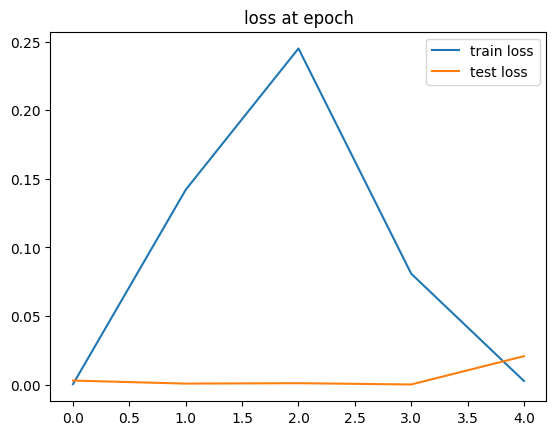

In [ ]:
#graph the loss al each epoch
train_losses= [tl.item() for tl in train_losses] #tl.item() converts each tensor in train_losses and test_losses to a scalar, making them compatible with plt.plot().
# In PyTorch, a tensor with zero dimensions is scaler
test_losses= [tl.item() for tl in test_losses]
plt.plot(train_losses,label='train loss')
plt.plot(test_losses,label='test loss')
plt.title('loss at epoch')
plt.legend()

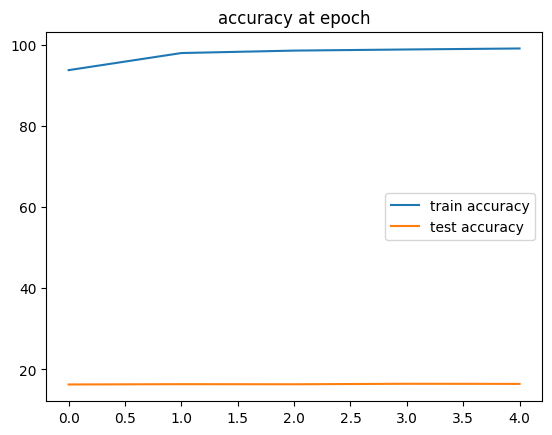

In [ ]:
#graph the accuracy at the end of each epoch
plt.plot([t/600 for t in train_correct],label='train accuracy')
plt.plot([t/600 for t in test_correct],label='test accuracy')
plt.title('accuracy at epoch')
plt.legend()

In [ ]:
test_loader=DataLoader(test_data,batch_size=1000,shuffle=False)

In [ ]:
with torch.no_grad():
  correct=0
  for x_test,y_test in test_loader:
    y_val=model(x_test)
    predicted=torch.max(y_val.data,1)[1]   #torch.max(y_val.data, 1) returns the maximum value along dimension 1 (class dimension) and its index.
                                           # [1] extracts the indices of the maximum values, representing the predicted class for each sample.

    correct+=(predicted==y_test).sum()

In [ ]:
#test for correct
correct.item()/len(test_data)*100

98.57000000000001

In [ ]:
#check for a random image
test_data[4142]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [ ]:
test_data[4143][0].reshape(28,28)    #reshape(28, 28) removes the channel dimension, converting it from (1, 28, 28) to (28, 28).

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

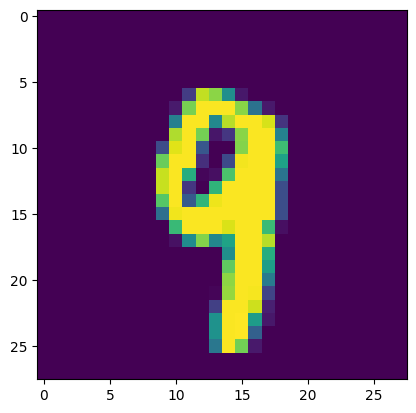

In [ ]:
plt.imshow(test_data[4143][0].reshape(28,28))

In [ ]:
model.eval()
with torch.no_grad():
  out=model(test_data[4143][0].view(1,1,28,28)) # batch size 1 color channel 1 28*28 image

In [ ]:
out

tensor([[-2.1693e+01, -1.8584e+01, -2.1709e+01, -1.5842e+01, -8.6330e+00,
         -1.8415e+01, -3.1769e+01, -1.2734e+01, -1.3396e+01, -1.8273e-04]])

In [ ]:
out.argmax()

tensor(9)